In [62]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
class Multinomial_Naive_Classification :
  def __init__(self, categories):
    self.categories = categories
  
  def prepare_data(self, method):
    train = fetch_20newsgroups(subset='train', categories=categories)
    test = fetch_20newsgroups(subset='test', categories=categories)
    if method not in ['Count', 'Tfidf'] :
      raise ValueError('Please select a good method')
    if method == 'Count' :
      vectorizer = CountVectorizer()
    elif method == 'Tfidf' :
      vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(train.data)
    X_test = vectorizer.transform(test.data)
    X_test = X_test.toarray()
    y_train = train.target
    y_test = test.target
    return X_train, X_test, y_train, y_test
  
  def likelihood(self, X_class, laplace=1):
    return ((X_class.sum(axis=0)) + laplace) / (np.sum(X_class.sum(axis=0) + laplace))
  
  def prior(self, X_class, m):
    return X_class.shape[0] / m

  def fit(self, X_train, y_train):
    m, n = X_train.shape
    classes = np.unique(y_train) 
    k = len(classes) 
    priors = np.zeros(k)
    likelihoods = np.zeros((k, n)) 
    for idx, label in enumerate(classes):
        X_train_c = X_train[y_train==label]
        priors[idx] = self.prior(X_train_c, m)
        likelihoods[idx, :] = self.likelihood(X_train_c)
    return priors, likelihoods

  def predict(self, method):
    X_train, X_test, y_train, y_test = self.prepare_data(method)
    priors, likelihoods = self.fit(X_train, y_train)
    self.y_test = y_test
    return np.argmax(np.log(priors) + X_test @ np.log(likelihoods.T), axis = 1)




In [90]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
exp = Multinomial_Naive_Classification(categories)
y_predicted_tfidf = exp.predict('Tfidf')
y_predicted_count = exp.predict('Count')
y_test = exp.y_test

In [91]:
from sklearn.metrics import classification_report

print("=========Classification report Count method =======")
print("Report: ", classification_report(y_test, y_predicted_count))

print("=========Classification report Tfidf method =======")
print("Report: ", classification_report(y_test, y_predicted_tfidf))

=========Classification report Count method =======
Report:                precision    recall  f1-score   support

           0       0.95      0.95      0.95       389
           1       0.94      0.96      0.95       394
           2       0.87      0.95      0.91       398
           3       0.92      0.74      0.82       251

    accuracy                           0.92      1432
   macro avg       0.92      0.90      0.91      1432
weighted avg       0.92      0.92      0.92      1432

=========Classification report Tfidf method =======
Report:                precision    recall  f1-score   support

           0       0.97      0.88      0.92       389
           1       0.92      0.92      0.92       394
           2       0.62      0.98      0.76       398
           3       1.00      0.19      0.32       251

    accuracy                           0.80      1432
   macro avg       0.88      0.75      0.73      1432
weighted avg       0.86      0.80      0.77      1432



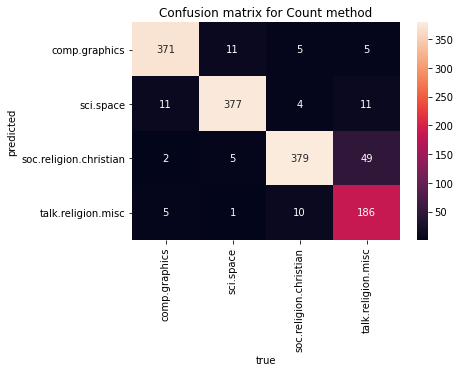

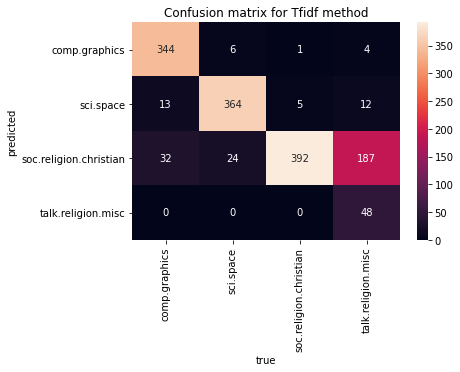

In [93]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#use confusion matrix
mat = confusion_matrix(y_test, y_predicted_count)

import seaborn as sns
sns.heatmap(mat.T, annot=True, fmt="d",
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true')
plt.ylabel('predicted')
plt.title('Confusion matrix for Count method')
plt.show()

mat = confusion_matrix(y_test, y_predicted_tfidf)

sns.heatmap(mat.T, annot=True, fmt="d",
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true')
plt.ylabel('predicted')
plt.title('Confusion matrix for Tfidf method')
plt.show()

